In [ ]:
!cd data

/bin/bash: line 0: cd: data: No such file or directory


In [ ]:
ls

DATASET.tar.gz  sample_data/


In [ ]:

!wget https://icsdweb.aegean.gr/awid/download.php?token=4271dcf2039236e7e16229209144e5b1 -O DATASET.tar.gz

--2023-04-26 22:01:48--  https://icsdweb.aegean.gr/awid/download.php?token=4271dcf2039236e7e16229209144e5b1
Resolving icsdweb.aegean.gr (icsdweb.aegean.gr)... 195.251.134.102
Connecting to icsdweb.aegean.gr (icsdweb.aegean.gr)|195.251.134.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11741104579 (11G) [application/octet-stream]
Saving to: ‘DATASET.tar.gz’

DATASET.tar.gz      100%[===================>]  10.93G  17.9MB/s    in 10m 10s 

2023-04-26 22:11:58 (18.4 MB/s) - ‘DATASET.tar.gz’ saved [11741104579/11741104579]



In [ ]:
!tar -zxvf /content/DATASET.tar.gz

DATASET/
DATASET/AWID-ATK-F-Trn.tar.gz
DATASET/AWID-ATK-F-Tst.tar.gz
DATASET/AWID-ATK-R-Trn.tar.gz
DATASET/AWID-ATK-R-Tst.tar.gz
DATASET/AWID-CLS-F-Trn.tar.gz
DATASET/AWID-CLS-F-Tst.tar.gz
DATASET/AWID-CLS-R-Trn.tar.gz
DATASET/AWID-CLS-R-Tst.tar.gz


In [ ]:
!tar -zxvf /content/DATASET/AWID-ATK-R-Tst.tar.gz

AWID-ATK-R-Tst/
AWID-ATK-R-Tst/1


In [ ]:
import numpy as np
import pandas as pd

def load_dataset(file):
    '''Fuction to load dataset file as dataframe'''
    df = pd.read_csv(file, header=None)
    return df

df = load_dataset('/content/AWID-ATK-R-Tst/1')
df.head()

<ipython-input-7-3995ab714c96>:6: DtypeWarning: Columns (37,38,39,40,41,42,43,44,45,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,74,88) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, header=None)


,0,1,2,3,4,5,6,7,8,9,...,145,146,147,148,149,150,151,152,153,154
0,0,?,0.0,1.393668e+09,0.000000,0.000000,0.000000,1552,1552,0,...,1,0,0x0000,0,?,?,?,0,1488,normal
1,0,?,0.0,1.393668e+09,0.001056,0.001056,0.001056,1552,1552,0,...,1,0,0x0000,0,?,?,?,0,1488,normal
2,0,?,0.0,1.393668e+09,0.000141,0.000141,0.001197,40,40,0,...,?,?,?,?,?,?,?,?,?,normal
3,0,?,0.0,1.393668e+09,0.000156,0.000156,0.001353,40,40,0,...,?,?,?,?,?,?,?,?,?,normal
4,0,?,0.0,1.393668e+09,0.001842,0.001842,0.003195,1552,1552,0,...,1,0,0x0000,0,?,?,?,0,1488,normal


In [ ]:
def set_colnames(df):
    '''This function sets column names according to wireshark for given dataframe'''
    with open("/content/colnames.txt") as f:
        # columns = [line.strip() for line in f]
        columns = []
        for line in f:
          line = line.strip()
          columns.append(line)

    df.columns = columns
    return df

df = set_colnames(df)
df.head()

,frame.interface_id,frame.dlt,frame.offset_shift,frame.time_epoch,frame.time_delta,frame.time_delta_displayed,frame.time_relative,frame.len,frame.cap_len,frame.marked,...,wlan.qos.priority,wlan.qos.eosp,wlan.qos.ack,wlan.qos.amsdupresent,wlan.qos.buf_state_indicated,wlan.qos.bit4,wlan.qos.txop_dur_req,wlan.qos.buf_state_indicated,data.len,class
0,0,?,0.0,1.393668e+09,0.000000,0.000000,0.000000,1552,1552,0,...,1,0,0x0000,0,?,?,?,0,1488,normal
1,0,?,0.0,1.393668e+09,0.001056,0.001056,0.001056,1552,1552,0,...,1,0,0x0000,0,?,?,?,0,1488,normal
2,0,?,0.0,1.393668e+09,0.000141,0.000141,0.001197,40,40,0,...,?,?,?,?,?,?,?,?,?,normal
3,0,?,0.0,1.393668e+09,0.000156,0.000156,0.001353,40,40,0,...,?,?,?,?,?,?,?,?,?,normal
4,0,?,0.0,1.393668e+09,0.001842,0.001842,0.003195,1552,1552,0,...,1,0,0x0000,0,?,?,?,0,1488,normal


In [ ]:
print('Shape of data: ', df.shape)


Shape of data:  (575643, 155)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575643 entries, 0 to 575642
Columns: 155 entries, frame.interface_id to class
dtypes: float64(6), int64(39), object(110)
memory usage: 680.7+ MB


In [ ]:
df.describe()

,frame.interface_id,frame.offset_shift,frame.time_epoch,frame.time_delta,frame.time_delta_displayed,frame.time_relative,frame.len,frame.cap_len,frame.marked,frame.ignored,...,radiotap.datarate,wlan.fc.version,wlan.fc.type,wlan.fc.subtype,wlan.fc.frag,wlan.fc.retry,wlan.fc.pwrmgt,wlan.fc.moredata,wlan.fc.protected,wlan.fc.order
count,575643.0,575643.0,5.756430e+05,575643.000000,575643.000000,575643.000000,575643.000000,575643.000000,575643.0,575643.0,...,575643.000000,575643.0,575643.000000,575643.000000,575643.000000,575643.000000,575643.000000,575643.000000,575643.000000,575643.0
mean,0.0,0.0,1.393669e+09,0.002085,0.002085,515.348604,520.099272,520.099272,0.0,0.0,...,25.369221,0.0,1.435602,7.800107,0.033154,0.066616,0.005564,0.004855,0.544171,0.0
std,0.0,0.0,4.004800e+02,0.006326,0.006326,400.480024,666.488453,666.488453,0.0,0.0,...,21.570766,0.0,0.697704,4.756854,0.179039,0.249356,0.074386,0.069512,0.498046,0.0
min,0.0,0.0,1.393668e+09,0.000000,0.000000,0.000000,40.000000,40.000000,0.0,0.0,...,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.0,0.0,1.393668e+09,0.000287,0.000287,106.319816,40.000000,40.000000,0.0,0.0,...,1.000000,0.0,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.0,0.0,1.393669e+09,0.000499,0.000499,453.480626,124.000000,124.000000,0.0,0.0,...,24.000000,0.0,2.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
75%,0.0,0.0,1.393669e+09,0.001096,0.001096,930.050823,1552.000000,1552.000000,0.0,0.0,...,54.000000,0.0,2.000000,13.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
max,0.0,0.0,1.393669e+09,0.344335,0.344335,1200.289872,1570.000000,1570.000000,0.0,0.0,...,54.000000,0.0,2.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


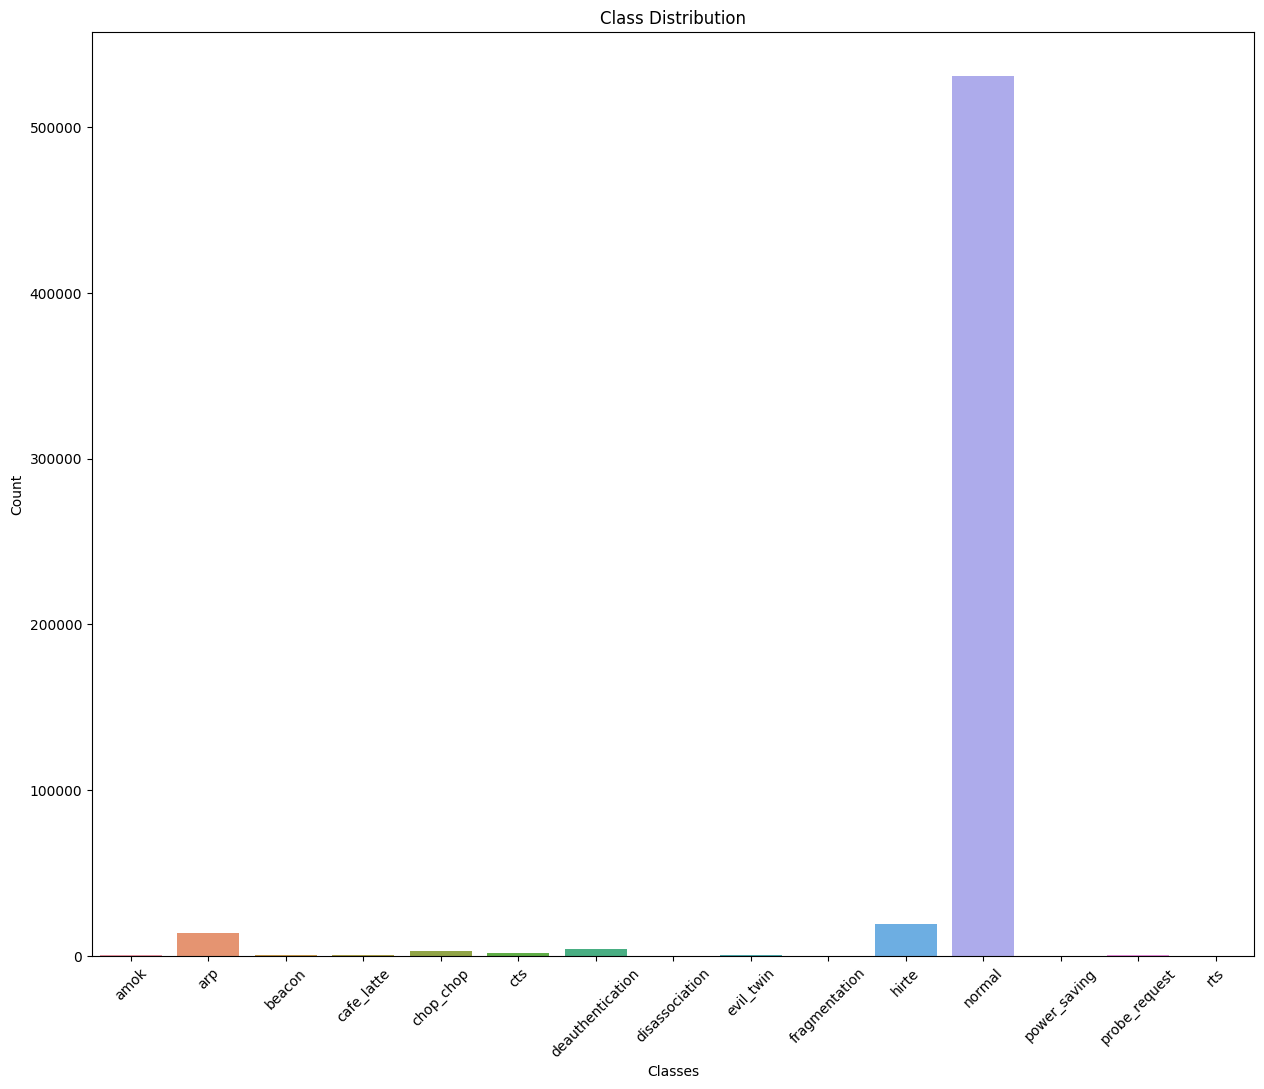

{'amok': 477, 'arp': 13644, 'beacon': 599, 'cafe_latte': 379, 'chop_chop': 2871, 'cts': 1759, 'deauthentication': 4445, 'disassociation': 84, 'evil_twin': 611, 'fragmentation': 167, 'hirte': 19089, 'normal': 530785, 'power_saving': 165, 'probe_request': 369, 'rts': 199}


In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

def class_distrib(df):
    '''This function displays class distribution as a bar plot for the given dataframe'''
    unique, counts = np.unique(df['class'], return_counts=True)
    distrib = dict(zip(unique, counts))

    plt.figure(figsize=(15, 12))
    sns.barplot(x=list(distrib.keys()), y=list(distrib.values()))
    plt.title("Class Distribution")
    plt.xticks(rotation=45)
    plt.xlabel("Classes")
    plt.ylabel("Count")

    plt.show()
    print(distrib)
    
class_distrib(df)

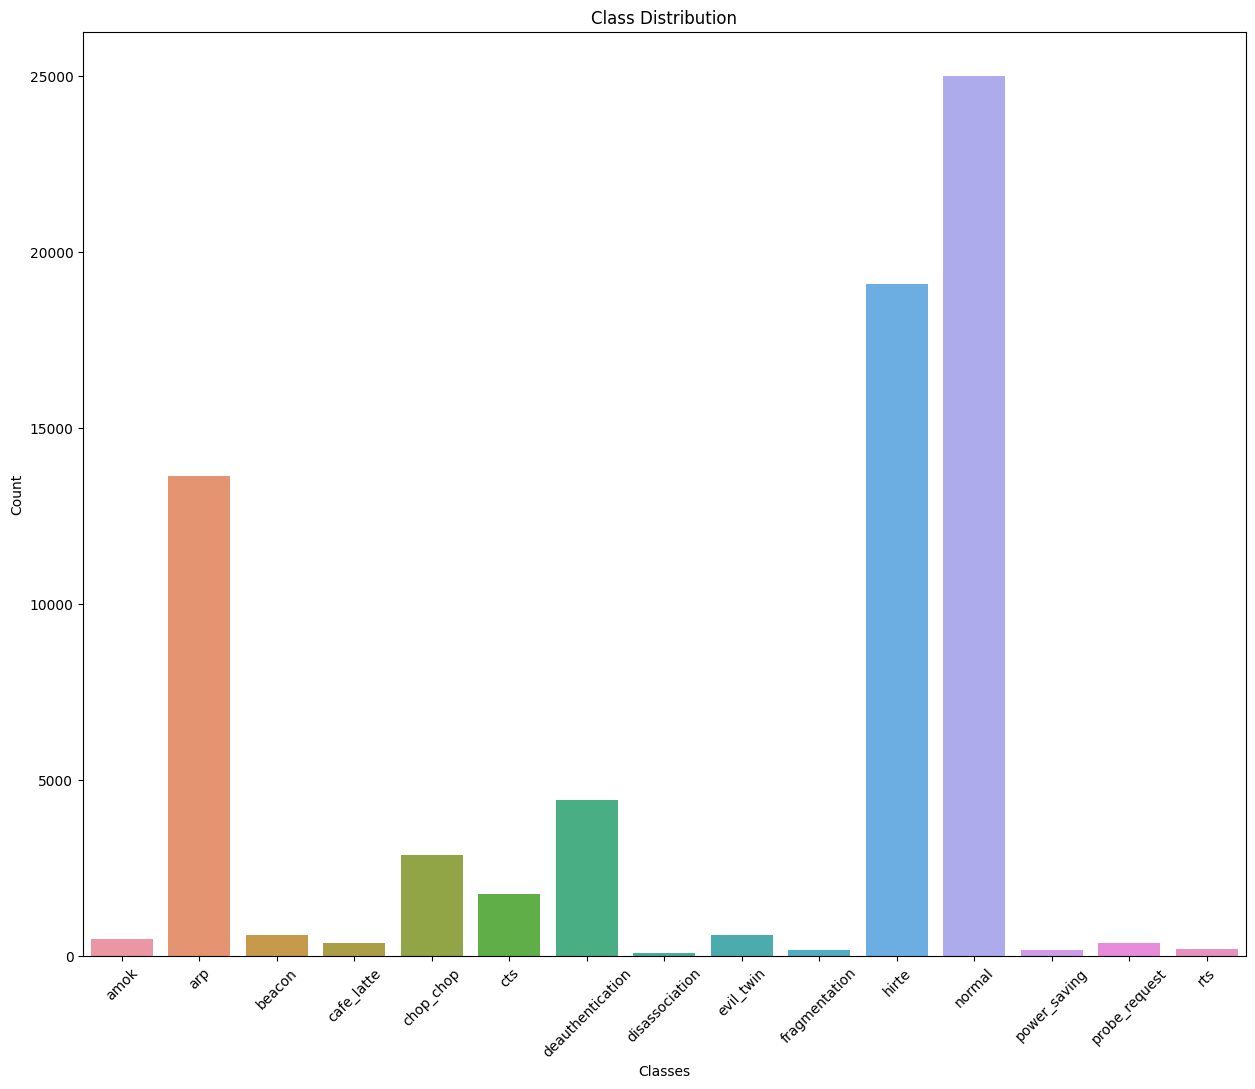

{'amok': 477, 'arp': 13644, 'beacon': 599, 'cafe_latte': 379, 'chop_chop': 2871, 'cts': 1759, 'deauthentication': 4445, 'disassociation': 84, 'evil_twin': 611, 'fragmentation': 167, 'hirte': 19089, 'normal': 25000, 'power_saving': 165, 'probe_request': 369, 'rts': 199}


In [ ]:
def down_sample(df, class_name, n):
    '''This function extracts n samples from the given dataframe for the given input class'''
    df_normal = df[df['class'] == class_name]
    df = df[df['class'] != class_name]

    df_normal = df_normal.sample(n=n, random_state=420)

    df = pd.concat([df_normal, df], axis=0)

    return df

df = down_sample(df, 'normal', 25000)

class_distrib(df)

In [ ]:
df.shape


(69858, 155)

In [ ]:
def clean_data(df):
    '''Cleans the the given dataframe'''
    # Replace all '?' with NaNs
    df = df.replace('?', np.nan)

    # Remove columns with >= 85% NaNs
    thres_limit = len(df) * 0.25
    df = df.dropna(thresh=int(thres_limit), axis=1)

    # Remove columns with constant value
    df = df.drop(columns=df.columns[df.nunique()==1])

    # Remove rows with >= 50% NaNs
    thres_limit = df.shape[1] * 0.50
    df = df.dropna(thresh=int(thres_limit), axis=0)
    
    return df

def sub_clean_data(df):
    '''Cleans the the given dataframe'''
    # Replace all '?' with NaNs
    df = df.replace('?', np.nan)

    # Remove rows with >= 50% NaNs
    thres_limit = df.shape[1] * 0.50
    df = df.dropna(thresh=int(thres_limit), axis=0)
    
    return df


df = clean_data(df)

In [ ]:
df.shape

(69858, 62)

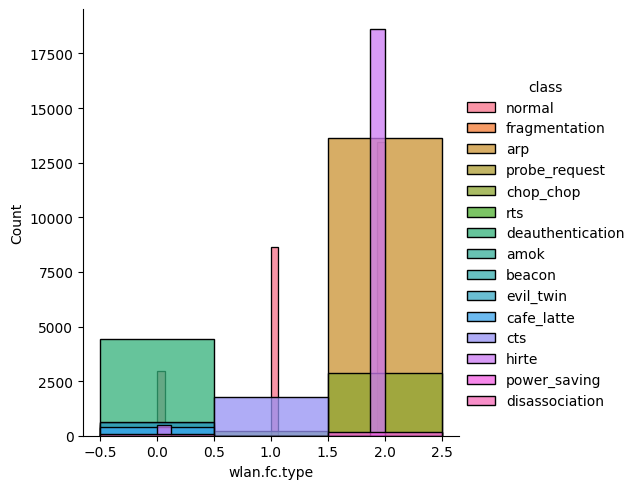

In [ ]:

sns.FacetGrid(df, hue='class', height=5).map(sns.histplot, 'wlan.fc.type').add_legend()
plt.show()

In [ ]:
relevant_columns = ['wlan.fc.type', 'wlan.fc.type_subtype', 'wlan.fc.subtype', 'wlan.fc.ds', 'frame.len', 'wlan.fc.protected', \
                    'wlan.duration', 'frame.time_delta_displayed', 'wlan.seq', 'class']
df = df[relevant_columns]
df.head(3)


,wlan.fc.type,wlan.fc.type_subtype,wlan.fc.subtype,wlan.fc.ds,frame.len,wlan.fc.protected,wlan.duration,frame.time_delta_displayed,wlan.seq,class
80899,0,0x08,8,0x00,159,0,0,0.002071,2745,normal
359918,1,0x1d,13,0x00,40,0,0,0.000142,NaN,normal
223134,1,0x1d,13,0x00,40,0,0,0.000305,NaN,normal


All class rows which still have some NaN value:  10584
Normal class rows which still have some NaN value:  8626


<ipython-input-19-b89ae7b466b4>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_nan_rows_normal = df[df.isnull().any(axis=1)][df['class'] == 'normal']


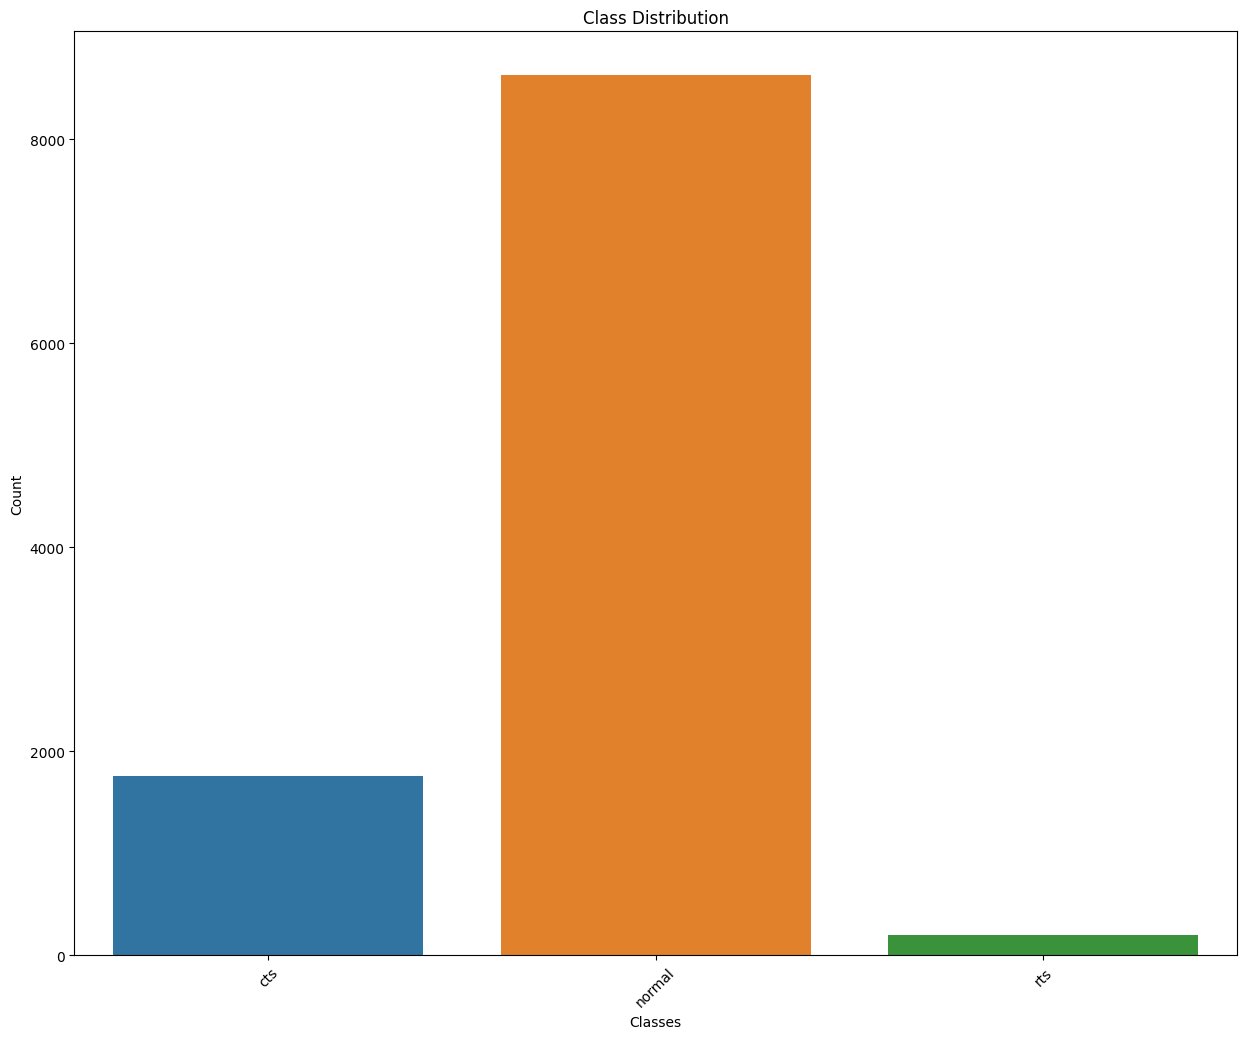

{'cts': 1759, 'normal': 8626, 'rts': 199}


wlan.fc.type                  False
wlan.fc.type_subtype          False
wlan.fc.subtype               False
wlan.fc.ds                    False
frame.len                     False
wlan.fc.protected             False
wlan.duration                  True
frame.time_delta_displayed    False
wlan.seq                       True
class                         False
dtype: bool

In [ ]:
# Rows which still have some NaN value 
df_nan_rows = df[df.isnull().any(axis=1)]
print('All class rows which still have some NaN value: ', len(df_nan_rows))

df_nan_rows_normal = df[df.isnull().any(axis=1)][df['class'] == 'normal']
print('Normal class rows which still have some NaN value: ', len(df_nan_rows_normal))

class_distrib(df_nan_rows)
df.isna().any()

In [ ]:

#Fill the NULL values
def fill_nulls(df):
    '''Fills all null entries'''
    null_cols = list(df.columns[df.isna().any()])
    for c in null_cols:
        df[c] = df[c].apply(pd.to_numeric, errors='ignore')
        df[c] = df[c].fillna(value=df[c].mean())
    return df

df = fill_nulls(df)
df_nan_rows = df[df.isnull().any(axis=1)]
df_nan_rows

,wlan.fc.type,wlan.fc.type_subtype,wlan.fc.subtype,wlan.fc.ds,frame.len,wlan.fc.protected,wlan.duration,frame.time_delta_displayed,wlan.seq,class


In [ ]:

relevant_columns = df.columns
with open('/content/relevant_columns.txt', 'w') as f:
    [f.write(rc+'\n') for rc in relevant_columns]

In [ ]:
df.dtypes


wlan.fc.type                    int64
wlan.fc.type_subtype           object
wlan.fc.subtype                 int64
wlan.fc.ds                     object
frame.len                       int64
wlan.fc.protected               int64
wlan.duration                 float64
frame.time_delta_displayed    float64
wlan.seq                      float64
class                          object
dtype: object

In [ ]:

object_cols = list(df.select_dtypes(['object']))
print('Unique category counts: ')
for c in object_cols:
    print(c, '=>', df[c].value_counts().count())

Unique category counts: 
wlan.fc.type_subtype => 19
wlan.fc.ds => 3
class => 15


In [ ]:
def to_numeric_dtype(df):
    to_num_cols = ['frame.time_delta_displayed', 'frame.len', 'wlan.duration', 'wlan.seq']
    for oc in to_num_cols:
        df[oc] = df[oc].apply(pd.to_numeric, errors='ignore')
    return df

df = to_numeric_dtype(df)

In [ ]:

# Save processed data to file
df.to_csv('/content/train_processed.csv', index=False)

In [ ]:
# Load processed data to df
df = pd.read_csv('/content/train_processed.csv')

In [ ]:
X = df.drop(['class'], axis=1)
y = df['class']

In [ ]:

from sklearn.preprocessing import StandardScaler
import joblib

std_cols =  ['frame.time_delta_displayed', 'frame.len', 'wlan.duration', 'wlan.seq']
with open('scaler_save/columns.txt', 'w') as f:
    [f.write(c+'\n') for c in std_cols]

standard_scaler = StandardScaler()
X[std_cols] = standard_scaler.fit_transform(X[std_cols])

# Save this scalar to file
joblib.dump(standard_scaler, 'scaler_save/scaler.gz')

['scaler_save/scaler.gz']

In [ ]:
from sklearn.preprocessing import OneHotEncoder

enc_cols = ['wlan.fc.type_subtype', 'wlan.fc.type', 'wlan.fc.subtype', 'wlan.fc.ds', 'wlan.fc.protected']

with open('encoder_save/columns.txt', 'w') as f:
    [f.write(c+'\n') for c in enc_cols]
    
oh_encoder_x = OneHotEncoder(sparse=False, handle_unknown='ignore')
array_ohe = oh_encoder_x.fit_transform(X[enc_cols])
df_ohe = pd.DataFrame(array_ohe, index=df.index)

#Extract only the columns that didnt need to be encoded
df_other = X.drop(columns=enc_cols)

#Concatenate the two dataframes : 
X = pd.concat([df_ohe, df_other], axis=1)

# Save this encoder to file

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:

print('Shape of y before encoding: ', y.shape)
print('ReShape of y for encoding: ', y.values.reshape(-1, 1).shape)

oh_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_categorical = oh_encoder.fit_transform(y.values.reshape(-1, 1))
print('Shape of y after encoding: ', y_categorical.shape)

# Save this encoder to file
joblib.dump(oh_encoder, 'encoder_save/encoder_y.gz')


Shape of y before encoding:  (69858,)
ReShape of y for encoding:  (69858, 1)
Shape of y after encoding:  (69858, 15)


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


['encoder_save/encoder_y.gz']

In [ ]:

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y_categorical, test_size=0.33, stratify=y_categorical)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.33, stratify=y_val)

In [ ]:

class_labels = oh_encoder.categories_[0]
with open('/content/class_labels.txt', 'w') as f:
    [f.write(cl+'\n') for cl in class_labels]

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model

def create_model(input_shape, n_class):
    """This function creates a simple DL model"""
    input_layer = tf.keras.Input(shape=(input_shape,))
    
    dense_layer1 = layers.Dense(16, activation='relu')(input_layer)
    dense_layer2 = layers.Dense(32, activation='relu')(dense_layer1)
    dense_layer3 = layers.Dense(32, activation='relu')(dense_layer2)
    
    output_layer = layers.Dense(n_class, activation='softmax')(dense_layer3)
    return Model(input_layer, output_layer)
    
model = create_model(X_train.shape[1], len(oh_encoder.categories_[0]))

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 42)]              0         
                                                                 
 dense (Dense)               (None, 16)                688       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 15)                495       
                                                                 
Total params: 2,783
Trainable params: 2,783
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), metrics=['accuracy'])


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
%load_ext tensorboard

log_dir="tensorboard\\logs"
tensorboard = TensorBoard(log_dir=log_dir, histogram_freq=1, write_graph=True)

checkpoint = ModelCheckpoint(filepath='/content/model_save/best_model.h5', monitor='val_accuracy',
                             verbose=1, save_best_only=True, mode='auto')

earlystop = EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=10, verbose=1)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val),
              batch_size=128, callbacks=[checkpoint, earlystop, tensorboard])

Epoch 1/10
362/366 [============================>.] - ETA: 0s - loss: 0.9772 - accuracy: 0.7475
Epoch 1: val_accuracy improved from -inf to 0.93144, saving model to /content/model_save/best_model.h5
366/366 [==============================] - 3s 4ms/step - loss: 0.9702 - accuracy: 0.7494 - val_loss: 0.2824 - val_accuracy: 0.9314
Epoch 2/10
366/366 [==============================] - ETA: 0s - loss: 0.2221 - accuracy: 0.9363
Epoch 2: val_accuracy improved from 0.93144 to 0.94536, saving model to /content/model_save/best_model.h5
366/366 [==============================] - 1s 3ms/step - loss: 0.2221 - accuracy: 0.9363 - val_loss: 0.1793 - val_accuracy: 0.9454
Epoch 3/10
364/366 [============================>.] - ETA: 0s - loss: 0.1641 - accuracy: 0.9526
Epoch 3: val_accuracy improved from 0.94536 to 0.95824, saving model to /content/model_save/best_model.h5
366/366 [==============================] - 1s 3ms/step - loss: 0.1640 - accuracy: 0.9525 - val_loss: 0.1408 - val_accuracy: 0.9582
Epoc

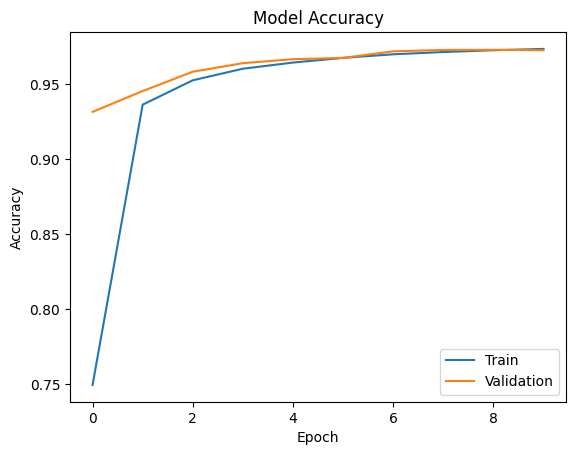

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [ ]:

from sklearn.metrics import confusion_matrix, classification_report

y_preds_val = np.argmax(model.predict(X_val), axis=1)
y_val = np.argmax(y_val, axis=1)
y_preds_test = np.argmax(model.predict(X_test), axis=1)
y_test = np.argmax(y_test, axis=1)
y_preds_train = np.argmax(model.predict(X_train), axis=1)
y_train = np.argmax(y_train, axis=1)

with open('/content/class_labels.txt', 'r') as f:
    class_labels = np.array([line.strip() for line in f])

cm_val = confusion_matrix(class_labels[y_val], class_labels[y_preds_val])
cm_test = confusion_matrix(class_labels[y_test], class_labels[y_preds_test])
cm_train = confusion_matrix(class_labels[y_train], class_labels[y_preds_train])

df_cm_val = pd.DataFrame(cm_val, columns=class_labels, index=class_labels)
df_cm_train = pd.DataFrame(cm_train, columns=class_labels, index=class_labels)
df_cm_test = pd.DataFrame(cm_test, columns=class_labels, index=class_labels)
df_cm_val.index.name = df_cm_train.index.name = df_cm_test.index.name = 'Actual'
df_cm_val.columns.name = df_cm_train.columns.name = df_cm_test.columns.name = 'Predicted'

1463/1463 [==============================] - 2s 2ms/step


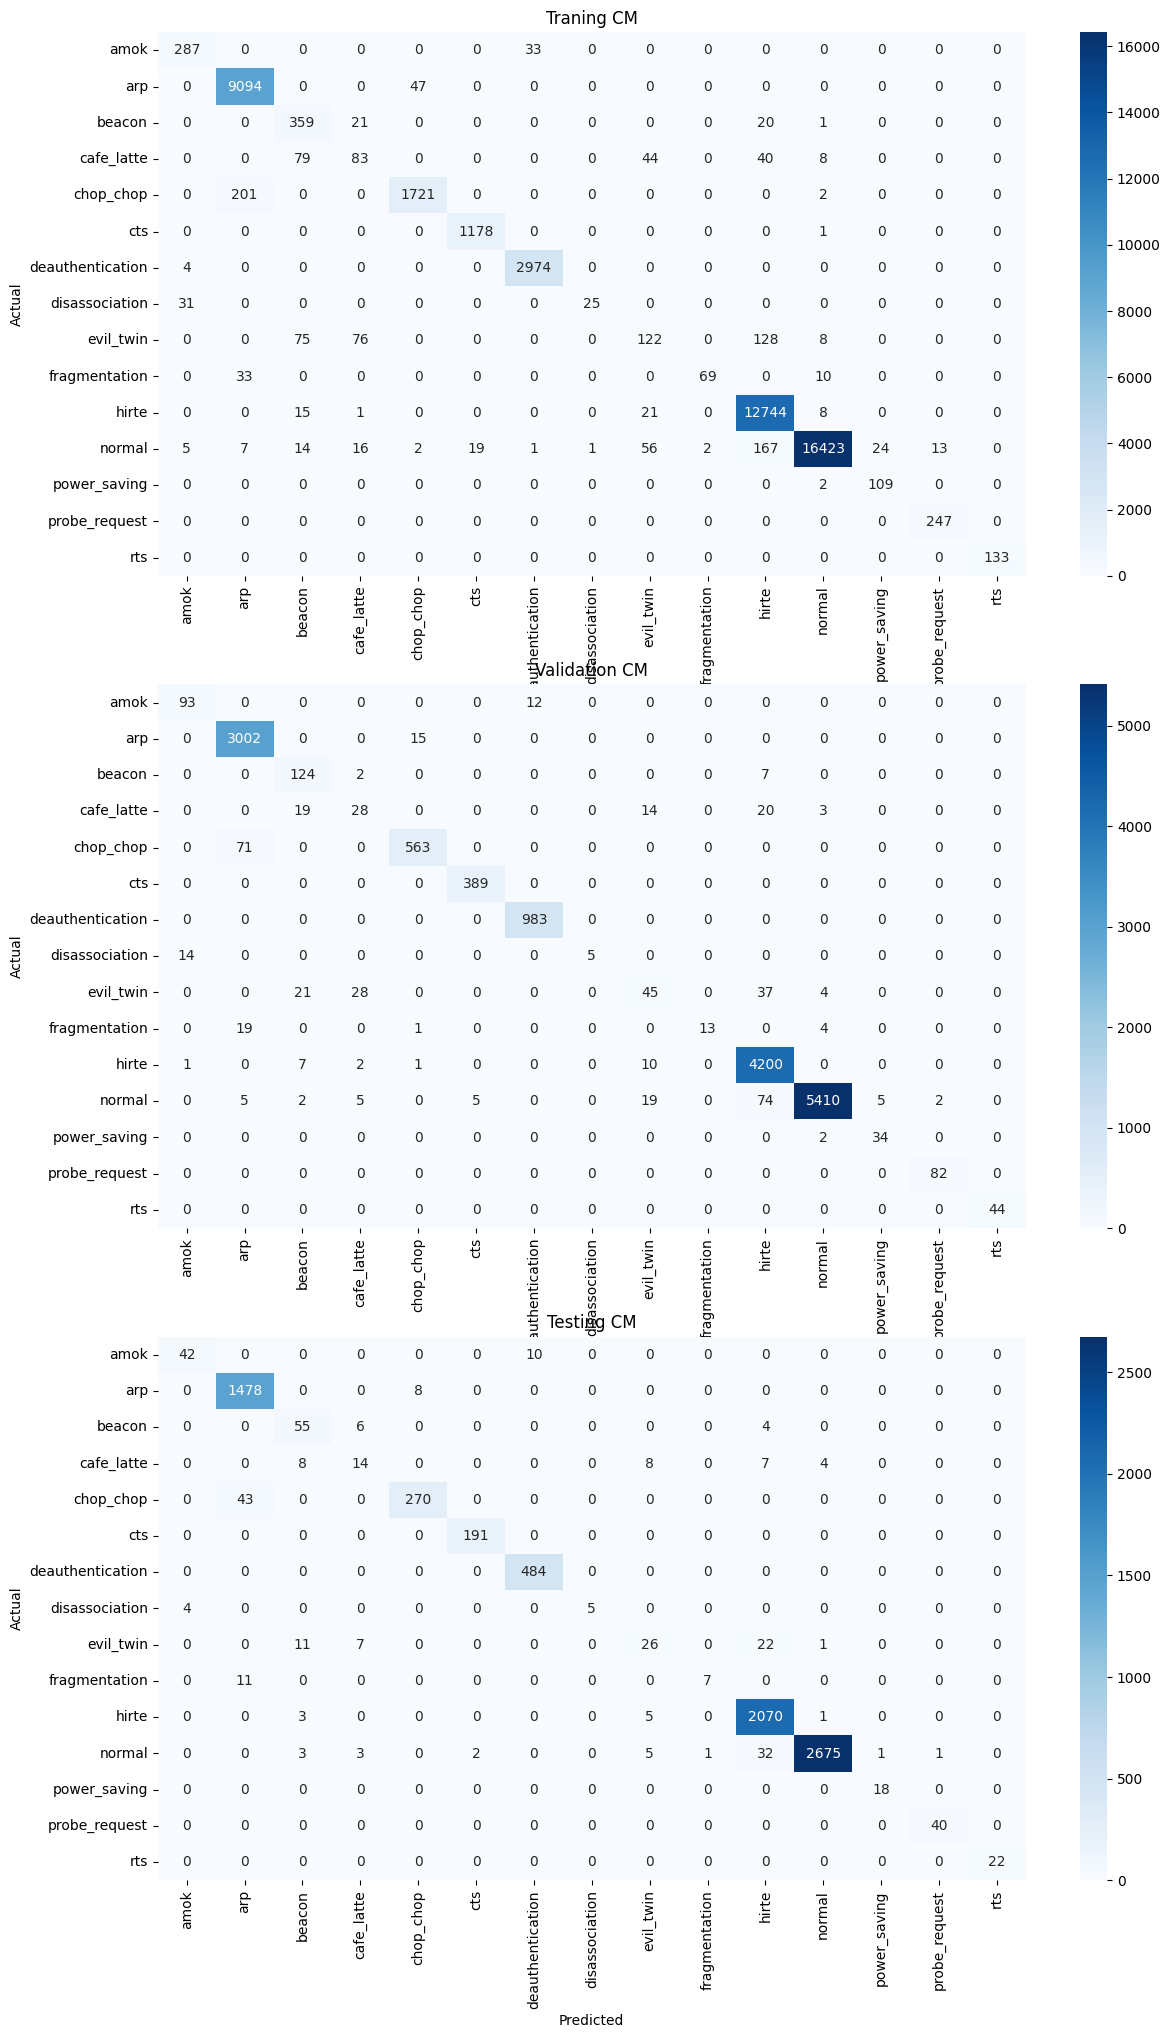

In [ ]:
fig = plt.figure(figsize = (14, 24))

fig.add_subplot(3, 1, 1)
sp2 = sns.heatmap(df_cm_train, cmap="Blues", annot=True, fmt='g')
sp2.set_title('Traning CM')

fig.add_subplot(3, 1, 2)
sp1 = sns.heatmap(df_cm_val, cmap="Blues", annot=True, fmt='g')
sp1.set_title('Validation CM')

fig.add_subplot(3, 1, 3)
sp2 = sns.heatmap(df_cm_test, cmap="Blues", annot=True, fmt='g')
sp2.set_title('Testing CM')

plt.show()

In [ ]:

print(classification_report(class_labels[y_val], class_labels[y_preds_val], target_names=list(class_labels)))
print(classification_report(class_labels[y_test], class_labels[y_preds_test], target_names=list(class_labels)))

                  precision    recall  f1-score   support

            amok       0.86      0.89      0.87       105
             arp       0.97      1.00      0.98      3017
          beacon       0.72      0.93      0.81       133
      cafe_latte       0.43      0.33      0.38        84
       chop_chop       0.97      0.89      0.93       634
             cts       0.99      1.00      0.99       389
deauthentication       0.99      1.00      0.99       983
  disassociation       1.00      0.26      0.42        19
       evil_twin       0.51      0.33      0.40       135
   fragmentation       1.00      0.35      0.52        37
           hirte       0.97      1.00      0.98      4221
          normal       1.00      0.98      0.99      5527
    power_saving       0.87      0.94      0.91        36
   probe_request       0.98      1.00      0.99        82
             rts       1.00      1.00      1.00        44

        accuracy                           0.97     15446
       macro